In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Preprocess.csv")

In [3]:
data.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  9 non-null      object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
data.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    1
dtype: int64

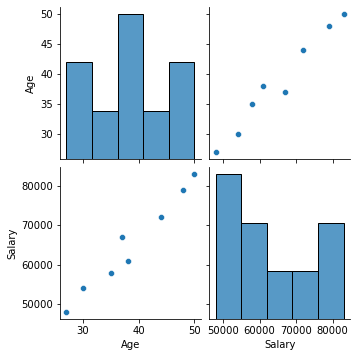

In [8]:
sns.pairplot(data = data)

### Mean = Numerical, Bell Shape (Gausian Distribution of Data)
### Median = Skewed, Numerical
### Mode = Categorical Data

## Missing Data Imputation using sklearn SimpleImputer

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer_cat = SimpleImputer(strategy = 'most_frequent') # mode

In [11]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [12]:
data['Age'] = imputer.fit_transform(data[['Age']])

In [13]:
data['Salary'] = imputer.fit_transform(data[['Salary']])

In [14]:
data['Purchased'] = imputer_cat.fit_transform(data[['Purchased']])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


## Handling Categorical Variables

In [16]:
data.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [17]:
data = pd.get_dummies(data[['Country', 'Age', 'Salary', 'Purchased']], drop_first = True)

In [18]:
data.head()

,Age,Salary,Country_Germany,Country_Spain,Purchased_Yes
0,44.0,72000.0,0,0,0
1,27.0,48000.0,0,1,1
2,30.0,54000.0,1,0,0
3,38.0,61000.0,0,1,0
4,40.0,61000.0,1,0,1


In [19]:
data.to_csv('Preprocess_Updated.csv', index = False)